In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
blobs = pd.read_csv('./DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

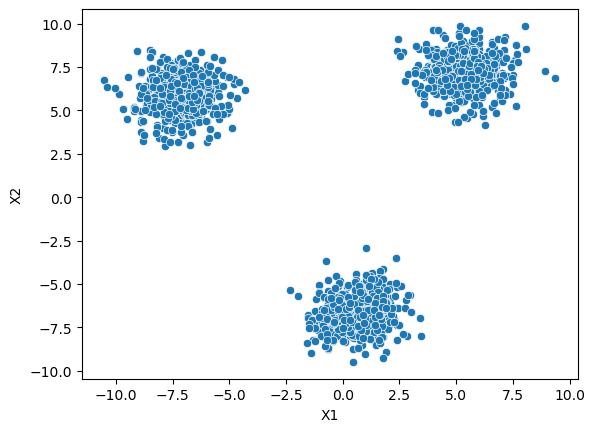

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moons = pd.read_csv('./DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

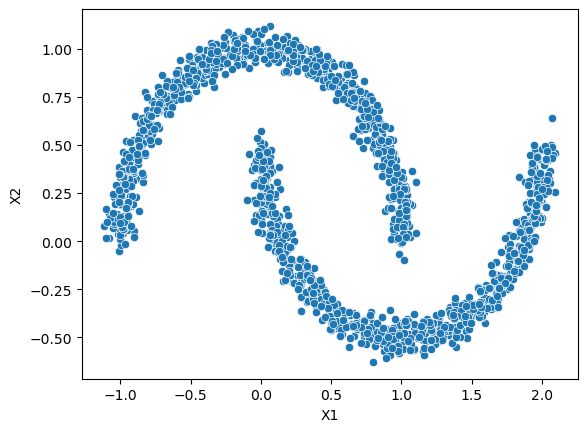

In [7]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [8]:
circles = pd.read_csv('./DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

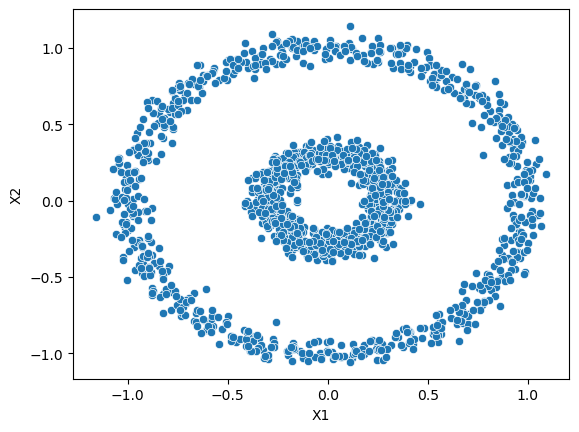

In [11]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [16]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [13]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=2)

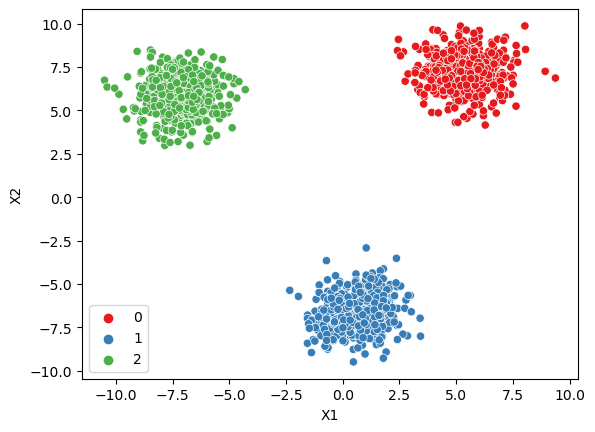

In [17]:
display_categories(model,blobs)

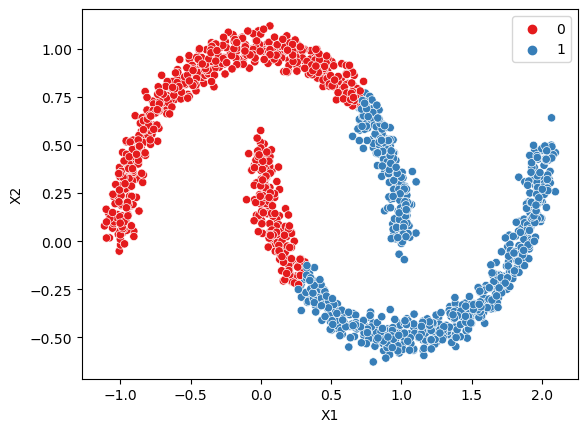

In [20]:
display_categories(model,moons)

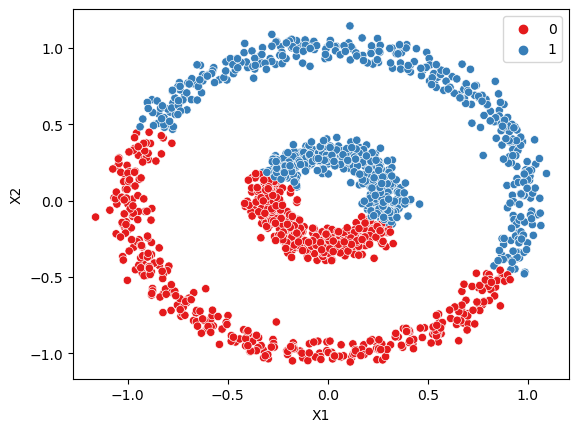

In [21]:
display_categories(model,circles)

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
model = DBSCAN()

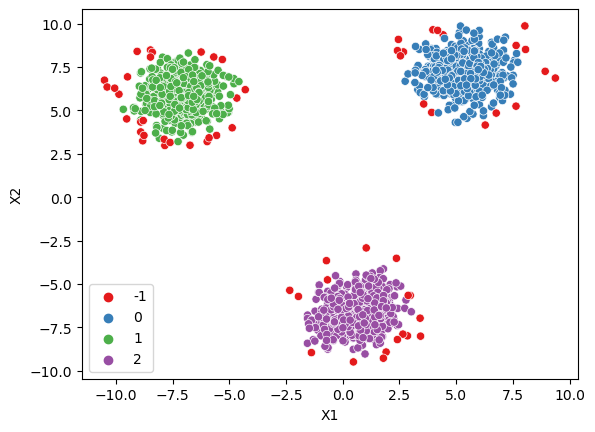

In [24]:
display_categories(model,blobs)

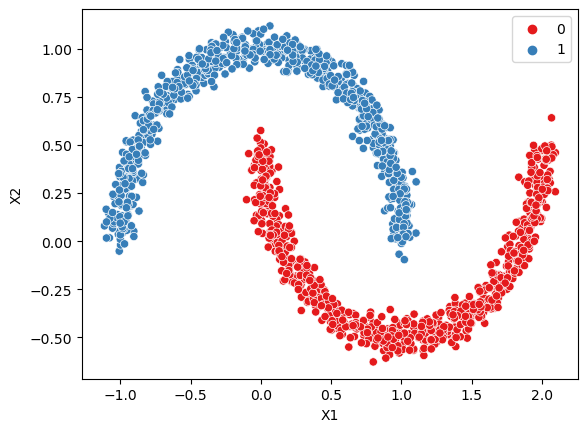

In [25]:
model = DBSCAN(eps=0.15)
display_categories(model,moons)

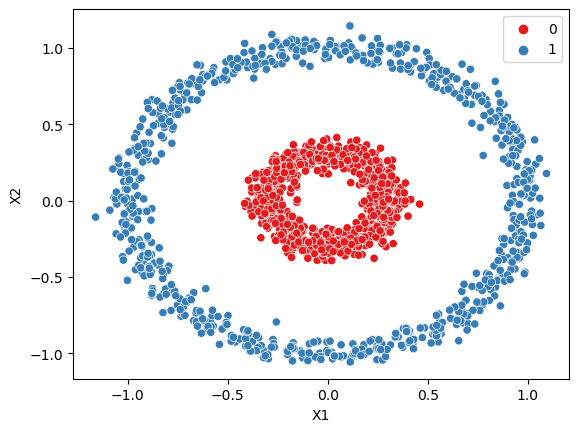

In [26]:
display_categories(model,circles)

## Hyperparameter Tunning Methods

In [27]:
two_blobs = pd.read_csv('./DATA/cluster_two_blobs.csv')

In [28]:
two_blobs_outlier = pd.read_csv('./DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

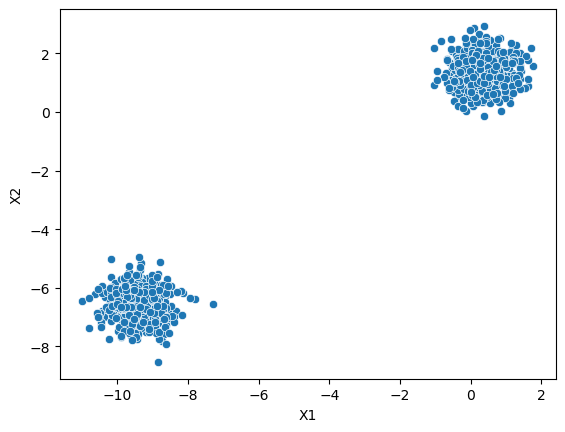

In [29]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

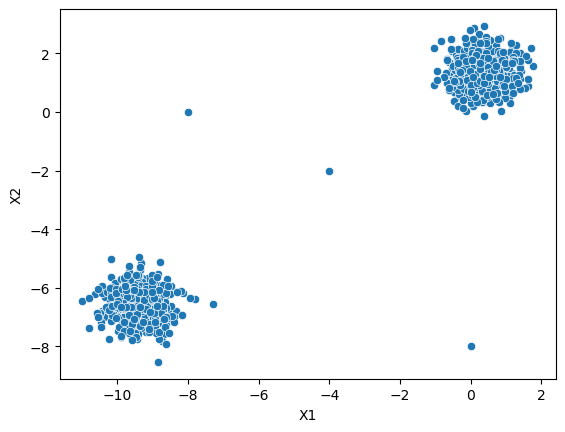

In [30]:
sns.scatterplot(data=two_blobs_outlier,x='X1',y='X2')

In [31]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN()

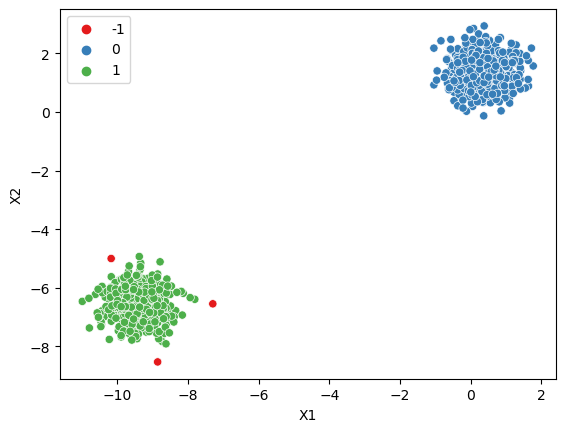

In [34]:
display_categories(dbscan,two_blobs)

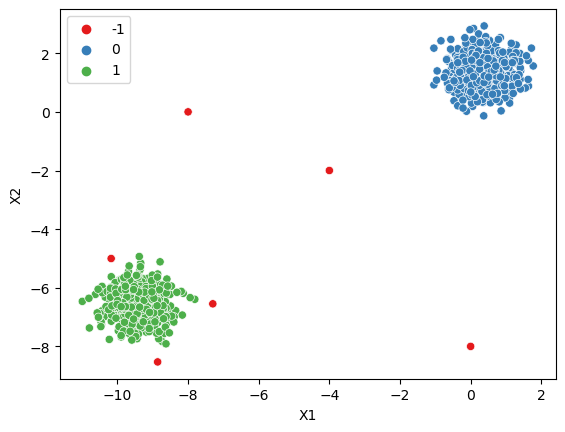

In [35]:
display_categories(dbscan,two_blobs_outlier)

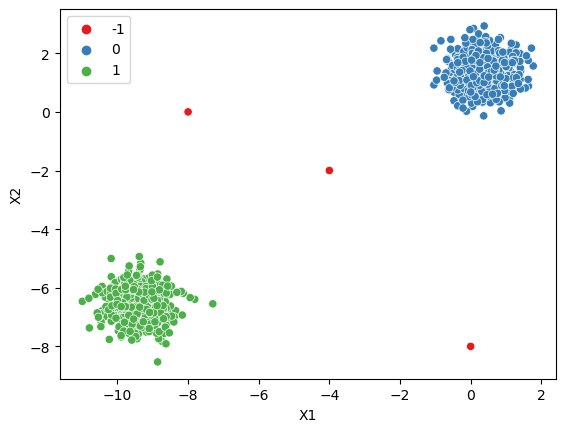

In [37]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outlier)

In [38]:
# Total Outlier Found
np.sum(dbscan.labels_ == -1)

3

In [39]:
# Percentage of Outlier
100 * 3 /(len(dbscan.labels_))

0.29910269192422734

In [41]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,10,100):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outlier Found
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    # Percentage of Outlier
    perct_outlier = 100 * np.sum(dbscan.labels_ == -1) /(len(dbscan.labels_))
    
    outlier_percent.append(perct_outlier)

<Axes: >

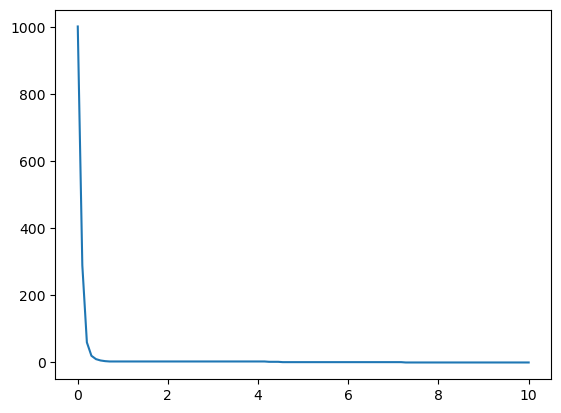

In [42]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outlier)

In [44]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,7,200):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outlier Found
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    # Percentage of Outlier
    perct_outlier = 100 * np.sum(dbscan.labels_ == -1) /(len(dbscan.labels_))
    
    outlier_percent.append(perct_outlier)

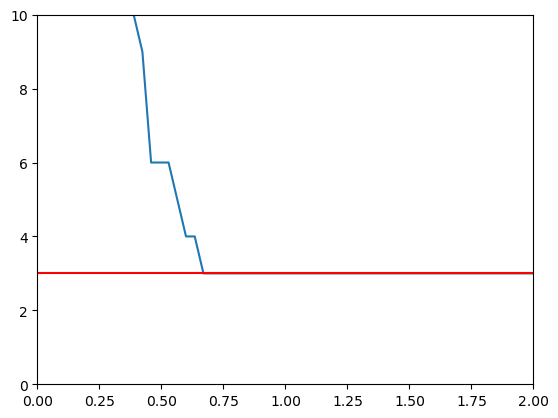

In [45]:
sns.lineplot(x=np.linspace(0.001,7,200), y=number_of_outlier)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

In [48]:
outlier_percent = []
number_of_outlier = []

for n in np.arange(1,100):
    
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outlier Found
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    # Percentage of Outlier
    perct_outlier = 100 * np.sum(dbscan.labels_ == -1) /(len(dbscan.labels_))
    
    outlier_percent.append(perct_outlier)

<Axes: >

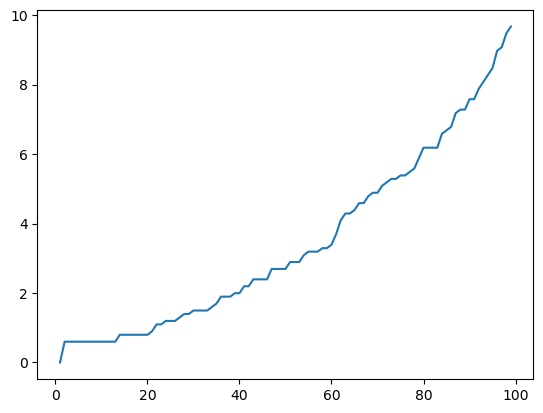

In [49]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)

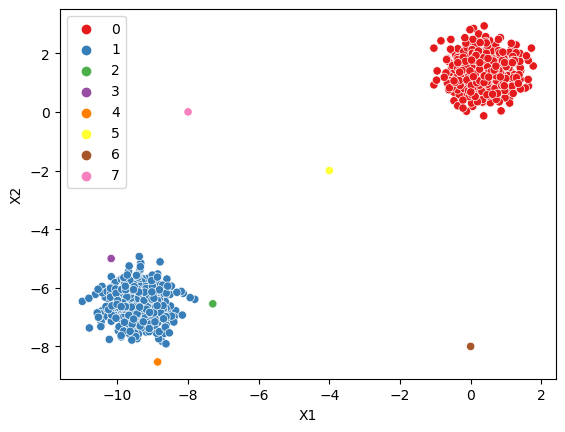

In [50]:
# Notewhile using min_sample as 1 you will have all data clusterd without an outlier.
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outlier)

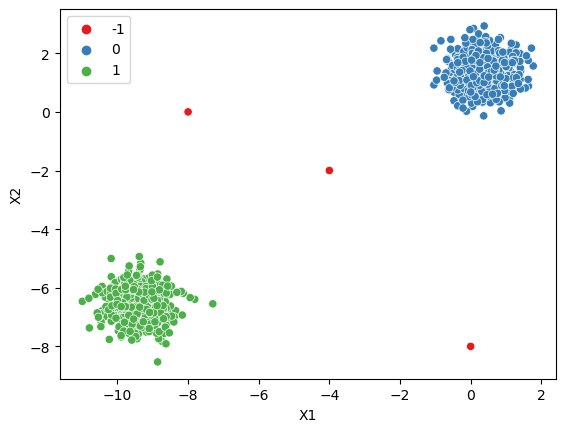

In [51]:
# Suggested min_sample is 2 * number of dimentions.
num_dim = two_blobs_outlier.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim,eps=0.75)
display_categories(dbscan,two_blobs_outlier)